# Importing libraries

For this analysis we are going to use 3 main libraries:

1. polars: a data manipulation framework.
2. matplotlib: A flexible plotting library.
3. seaborn: A plotting library that contains more sophisticated charts than matplotlib.

In [44]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

The data we are going to be used was collected by us for this project, and consists of 644,268 reviews for videogames scrapped from the review aggregator website metacritic. Since we do not own the copyright for these reviews we can't redistribute them ourselves, but the code used to scrape them can be found HERE.

In [2]:
df_reviews = pl.read_parquet("../data/raw/reviews.parquet")
df_reviews.head()


user,date,score,text,game,platform
str,date,i8,str,str,str
"""doodlerman""",2011-06-09,10,"""I'm one of tho…","""The Legend of …","""Nintendo 64"""
"""Jacody""",2010-11-25,10,"""Anyone who giv…","""The Legend of …","""Nintendo 64"""
"""Kaistlin""",2011-04-25,10,"""I won't bore y…","""The Legend of …","""Nintendo 64"""
"""SirCaestus""",2011-06-12,10,"""Everything in …","""The Legend of …","""Nintendo 64"""
"""StevenA""",2010-03-21,10,"""This game is t…","""The Legend of …","""Nintendo 64"""


We can see that this dataset has 6 fields:

- **user (str)**: The Metacritic Username of the author of the review.
- **date (date)**: The date in which the review was submitted.
- **score (int8)**: The score the used attributed to the game.
- **text (str)**: The text of the review.
- **platform (str)**: The platform in which the game was launched.

# Exploratory Data Analysis

Let us do some Exploratory Data Analysis on this dataset before doing any fancy Machine Learning stuff. 

## Review Length

Let us first calculate the review length (In characters) for each review.

In [3]:
df_reviews = df_reviews.with_columns(pl.col("text").str.lengths().alias("length"))
df_reviews.head()


user,date,score,text,game,platform,length
str,date,i8,str,str,str,u32
"""doodlerman""",2011-06-09,10,"""I'm one of tho…","""The Legend of …","""Nintendo 64""",1900
"""Jacody""",2010-11-25,10,"""Anyone who giv…","""The Legend of …","""Nintendo 64""",768
"""Kaistlin""",2011-04-25,10,"""I won't bore y…","""The Legend of …","""Nintendo 64""",176
"""SirCaestus""",2011-06-12,10,"""Everything in …","""The Legend of …","""Nintendo 64""",153
"""StevenA""",2010-03-21,10,"""This game is t…","""The Legend of …","""Nintendo 64""",504


We will start exploring the length of the reviews. Let us start looking at the length distribution:

Text(0.5, 1.0, 'Review Length')

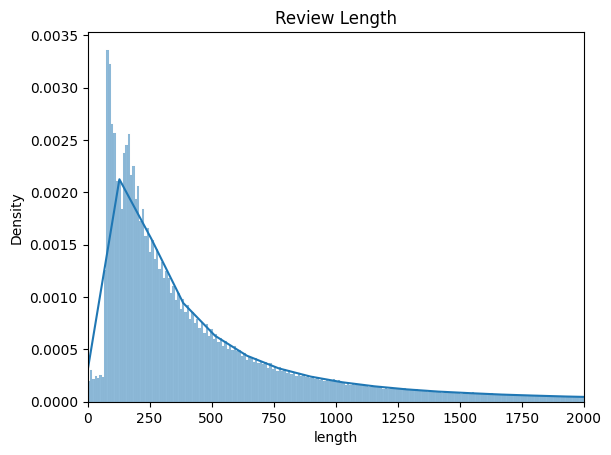

In [4]:
chart = sns.histplot(df_reviews, x="length", stat="density", kde=True)
chart.set_xlim(0, 2000)
chart.set_title("Review Length")


Since we will use the scores as our target it is important to look if there are any differences in length. For example, if we see that positive reviews are, on average, longer, our model might learn to assign positive scores to long reviews instead of looking at the actual words of the review.

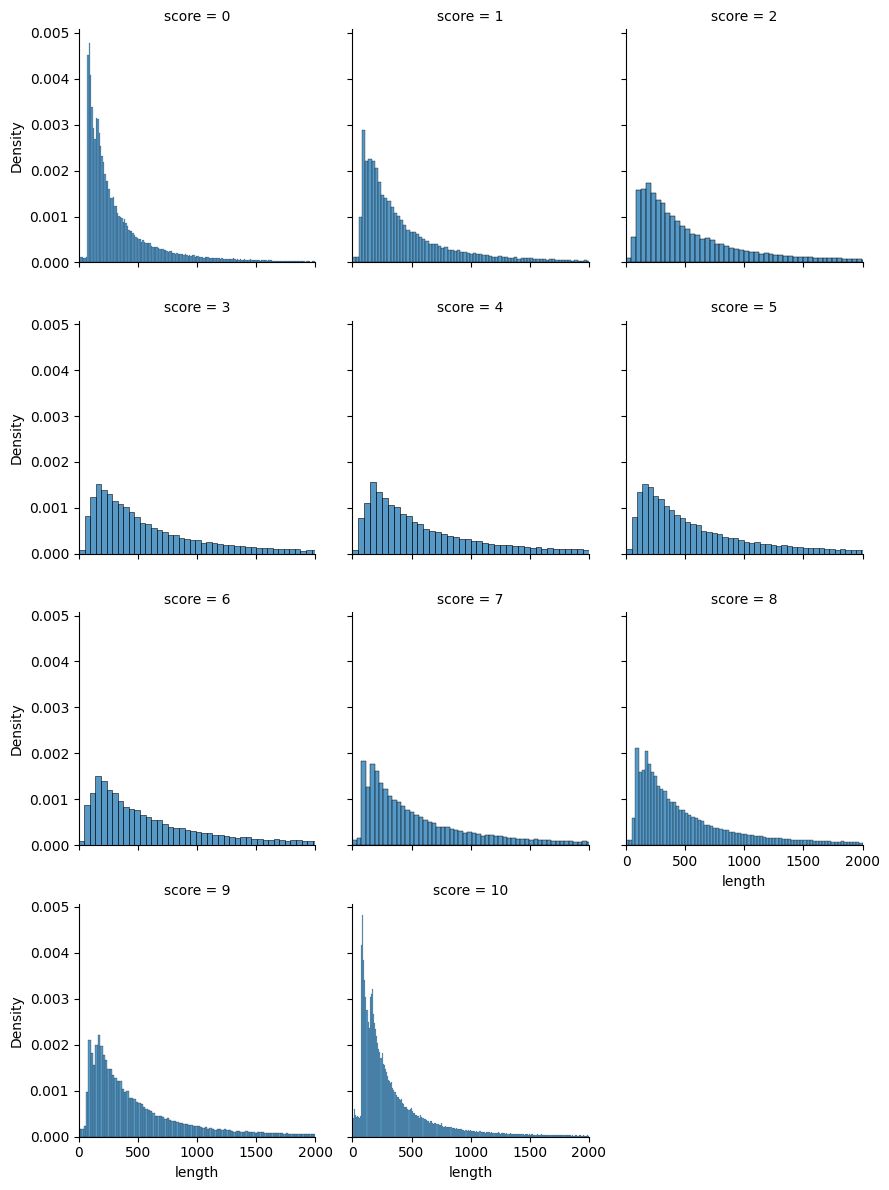

In [5]:
chart = sns.FacetGrid(
    data=df_reviews.to_pandas(), col="score", col_wrap=3, xlim=(0, 2000)
)
chart.map(sns.histplot, "length", stat="density")


There definetely seems to exist some difference, but it does not look that extreme. Let us see the average and standard deviation for review lengths in each score, as well as some quantiles and kurtosis:

In [6]:
df_reviews.groupby("score").agg(
    pl.col("length").mean().alias("mean_length"),
    pl.col("length").std().alias("std_length"),
    pl.col("length").min().alias("min_length"),
    pl.col("length").max().alias("max_length"),
    pl.col("length").quantile(0.25).alias("q25_length"),
    pl.col("length").quantile(0.5).alias("q50_length"),
    pl.col("length").quantile(0.75).alias("q75_length"),
    pl.col("length").kurtosis().alias("kurtosis_length"),
).sort("score")


score,mean_length,std_length,min_length,max_length,q25_length,q50_length,q75_length,kurtosis_length
i8,f64,f64,u32,u32,f64,f64,f64,f64
0,421.797906,570.567405,0,12206,134.0,233.0,459.0,23.863546
1,562.499556,713.379212,0,8776,171.0,319.0,641.0,13.954668
2,735.917923,865.950722,0,22310,221.0,429.0,871.0,21.449553
3,814.303202,928.722837,2,14571,246.0,479.0,986.0,9.745589
4,871.934633,986.430476,0,10843,255.0,507.0,1069.0,6.441591
5,838.200305,969.640852,0,19817,238.0,485.0,1016.0,10.053324
6,885.256264,1006.486573,0,11594,247.0,512.0,1088.0,5.371955
7,812.192088,952.58033,0,9233,222.0,457.0,982.0,6.098526
8,722.550472,883.212956,0,12713,203.0,402.0,843.0,9.103303


Ok, we learned some new things. First, there are empty reviews - Are they problem with our scrapping process, or do Metacritic allow for empty reviews? Let us check:

In [48]:
pl.Config.set_fmt_str_lengths(50)
df_reviews.filter(pl.col("length") == 0).head()


user,date,score,text,game,platform,length
str,date,i8,str,str,str,u32
"""YusufMetin""",2020-10-12,10,"""""","""Grand Theft Auto IV""","""Xbox 360""",0
"""Caldan""",2020-11-14,10,"""""","""Super Mario Galaxy""","""Wii""",0
"""Caldan""",2020-11-15,9,"""""","""Grand Theft Auto V""","""Xbox One""",0
"""Caldan""",2020-11-14,10,"""""","""The Legend of Zelda: Breath of the Wild""","""Switch""",0
"""Yosef0482958""",2022-01-27,10,"""""","""The Legend of Zelda: Breath of the Wild""","""Switch""",0


This Caldan fellow sure looks to like empty reviews. Let's try and find his review of Mario Galaxy on Metacritic:

![Example of an empty review by the user Caldan](./empty_review.png)

Well, apparently empty reviews are possible, and our scrapping process is working just fine. Given that, let us assess if the percentage of empty reviews varies with score:

In [54]:
df_reviews.groupby("score").agg(
    (pl.col("length") == 0).mean().alias("zero_length_ratio")
)


score,zero_length_ratio
i8,f64
0,0.000255
1,0.000117
2,0.000065
3,0.0
4,0.000292
5,0.000123
6,0.000022
7,0.000632
8,0.000191


Ok, it looks like this won't be a problem. The score with the higher ratio of zero length reviews is 10, and they only account to 0.16% of the reviews with that score.

## Score distribution

Another interesting analysis is to look into the score distribution

<Axes: ylabel='count'>

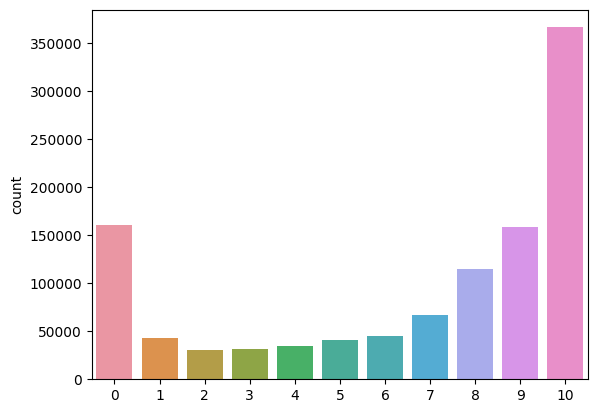

In [20]:
sns.countplot(x=df_reviews["score"].to_numpy())

We can see that the distribution is skewed towards the extreme values. Let us see how
this distribution evolves over time:

In [42]:
df_summary_score = (
    df_reviews.with_columns(pl.col("date").dt.year().alias("year"))
    .groupby("year")
    .agg(
        pl.col("score").mean().alias("mean_score"),
        pl.col("score").std().alias("std_score"),
        pl.col("score").min().alias("min_score"),
        pl.col("score").max().alias("max_score"),
        pl.col("score").quantile(0.25).alias("q25_score"),
        pl.col("score").quantile(0.5).alias("q50_score"),
        pl.col("score").quantile(0.75).alias("q75_score"),
    )
    .sort("year")
)

df_summary_score


year,mean_score,std_score,min_score,max_score,q25_score,q50_score,q75_score
i32,f64,f64,i8,i8,f64,f64,f64
2001,8.783217,2.213108,0,10,9.0,10.0,10.0
2002,8.322713,2.697153,0,10,8.0,10.0,10.0
2003,8.339511,2.662503,0,10,8.0,10.0,10.0
2004,8.233716,2.729396,0,10,8.0,10.0,10.0
2005,8.041274,2.821679,0,10,7.0,9.0,10.0
2006,7.968689,2.867243,0,10,7.0,9.0,10.0
2007,7.807076,2.886368,0,10,7.0,9.0,10.0
2008,7.611669,3.051757,0,10,6.0,9.0,10.0
2009,7.259212,3.237828,0,10,5.0,9.0,10.0


It seems that there is a tendency over time of a decrease of the average score. We can
also see that visually:

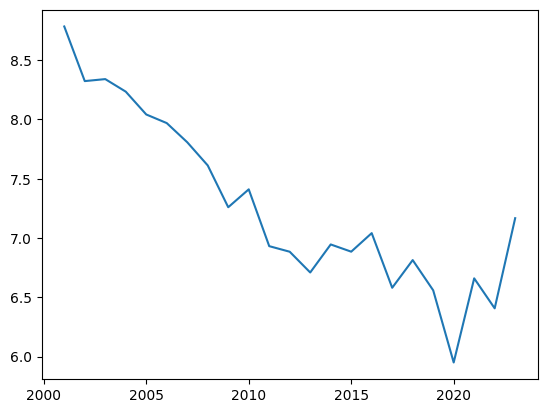

In [43]:
import matplotlib.pyplot as plt
plt.plot(df_summary_score["year"], df_summary_score["mean_score"])

We can also investigate how the whole distribution changed over time by looking
at a violion plot of the data:

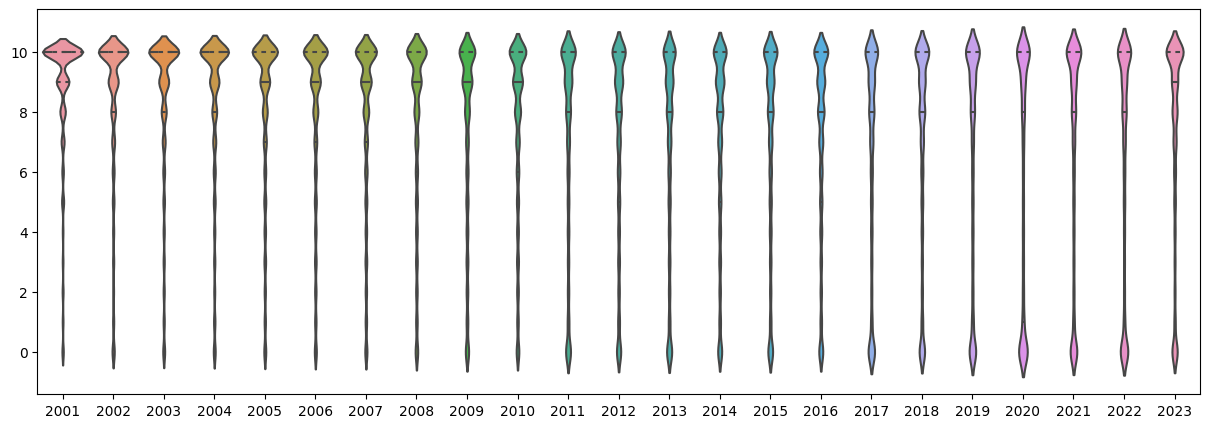

In [41]:
import matplotlib.pyplot as plt

fig, ax  = plt.subplots(figsize=(15, 5))
ax = sns.violinplot(
    y=df_reviews["score"].to_numpy(), 
    x=df_reviews["date"].dt.year().to_numpy(),
    inner="quartile",
    bw=0.10,
    ax=ax
)


We can see that over time the "tail" for the good scores is getting heavier toward intermediate scores. Also, the "lump"
around zero is also getting larger.

# Language Detection

Ok. We've got a good grasp of characterestics such as the length distribution of the text, but there are other important 
things we might need to check - Mainly, which language are the reviews written into. Since Metacritic
is a website with a global audience it is not a stretch to consider that there might be reviews written in different
languages.

A good way to check for languages different than English is to check for non-ascii characters:

In [14]:
def count_nonascii(text: str) -> int:
    return sum(ord(char) > 127 for char in text)


df_reviews = df_reviews.with_columns(
    pl.col("text").apply(count_nonascii).alias("nonascii")
)
df_reviews.filter(pl.col("nonascii") > 0).sort("nonascii", descending=True).head()


user,date,score,text,game,platform,length,nonascii
str,date,i8,str,str,str,u32,i64
"""psvitanews""",2014-05-05,9,"""Блуждания по п…","""Demon Gaze""","""PlayStation Vi…",8993,4034
"""Plasma_Boy""",2015-11-14,0,"""Если бы меня п…","""Fallout 4""","""PC""",8970,3987
"""Nelve""",2015-08-30,1,"""У игры есть по…","""World of Tanks…","""PC""",8776,3973
"""Sergi""",2014-11-28,5,"""Я ждал эту игр…","""Dragon Age: In…","""PC""",8869,3961
"""Gaghar""",2015-11-13,0,"""Можно так сказ…","""Fallout 4""","""PC""",8897,3928


Yeah. There are definetely non english reviews out there. Before deciding whether to
train a multilingual model or not, let us try and quantify each language. To infer the
language of a string of text we can use the langdetect library.

In [15]:
import langdetect
from langdetect.lang_detect_exception import LangDetectException


def detect_language(text: str) -> str:
    try:
        return langdetect.detect(text)
    except LangDetectException:
        return "unknown"


df_reviews = df_reviews.with_columns(
    pl.col("text").apply(detect_language).alias("language")
)
df_reviews.groupby("language").agg(pl.col("language").count().alias("count")).sort(
    "count", descending=True
)


language,count
str,u32
"""en""",947126
"""es""",46104
"""ru""",36653
"""pt""",24400
"""fr""",5493
"""de""",4690
"""it""",4158
"""tr""",2933
"""unknown""",2735


We see that most of the reviews are written in English. The second most common language is Spanish, with around
46,000 reviews. From this we can make another decision - We are only going to train our model in English text for now.
Although language models can deal with multiple/mixed language text due to their embedding components (More on that 
later) we don't have the size of corpus that would be necessary for that in this dataset.

# Saving our work

Let us save the final preprocessed dataset. We will keep for now the following fields:

- user
- date
- score
- text
- game
- platform
- length
- language

In [16]:
df_reviews.select([
    "user",
    "date",
    "score",
    "text",
    "length",
    "game",
    "platform",
    "language"
]).write_parquet("../data/processed/reviews.parquet")